# Adding Brian2 currents to the voxels
# To download neuron files : https://neuroinformatics.nl/HBP/morphology-viewer/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import neurom as nm
from neurom import viewer
from tqdm import tqdm

import brian2 as b2

In [2]:
morpho_path = '../morphologies/Scnn1a-Tg2-Cre.swc'
neuron = nm.load_neuron(morpho_path)

# Counting the volume in a voxel
Given a voxel resolution R, the neuron simply belongs to the cluster coordinates * R, floored to the integer value

In [3]:
resolution = .01 #points
example_voxel = np.int16(np.array([278, 627 , 184]) * resolution)
example_voxel

array([2, 6, 1], dtype=int16)

Visualizing...: 100%|████████████████████████████████████████████████████████████| 5179/5179 [00:05<00:00, 1003.74it/s]


857 neurons in the voxel


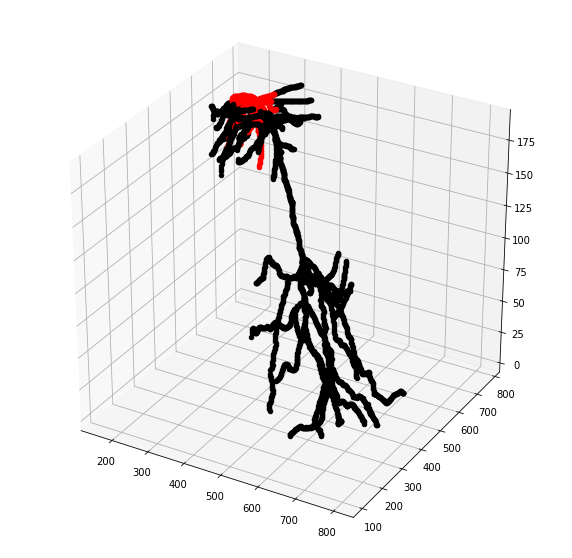

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

total_in_voxels = 0
for pts in tqdm(neuron.points, 'Visualizing...') :
    
    if (np.int16(pts[:3] * resolution) == example_voxel).all() : 
        ax.scatter(pts[0], pts[1], pts[2], c = 'r')
        total_in_voxels +=1 
    else : 
        ax.scatter(pts[0], pts[1], pts[2], c = 'k')


print('%d neurons in the voxel' % total_in_voxels)
plt.show()

# Making the neuron model
where oc is the optogenetic current

In [15]:
b2.start_scope()

g_adjustement = .0005                    #  multiplier of the leak current
C = 1 * b2.nF                               # membrane capacitance analysis:ignore
gL = 1. * b2.uS * g_adjustement             # leak currents analysis:ignore
EL = -70. * b2.mV                           # effective rest potential
v_thresh = -50. * b2.mV                     # effective threshold potential
v_reset = EL                                # post-AP reset potential analysis:ignore
Ee = 0 * b2.mV                              # exc reversal potential analysis:ignore
Ei = -70 * b2.mV                            # inh reversal potential analysis:ignore
DeltaT = 2 * b2.mV                          # AP post cut shape
Vcut = v_thresh + 5 * DeltaT                # actual threshold potential analysis:ignore

oc = total_in_voxels * .005 * b2.uS
eqNeuron = """
dvm/dt   = (gL*(EL - vm) + gL*DeltaT*exp((vm - v_thresh)/DeltaT)+ oc*(Ee-vm) )/ C : volt
"""
 

optoN = b2.NeuronGroup(1, eqNeuron, threshold='vm>Vcut', reset="vm=v_reset",
                      method='euler', name='neuronopto')
spikemon = b2.SpikeMonitor(optoN)

In [16]:
b2.run(100*b2.ms)

In [17]:
spikemon.spike_trains()

{0: array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
        11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
        13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
        15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
        17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
        19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
        22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
        24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8, 26. , 26.2,
        26.4, 26.6, 26.8, 27. , 27.2, 27.4, 27.6, 27.8, 28. , 28.2, 28.4,
        28.6, 28.8, 29. , 29.2, 29.